In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [37]:
path = "/content/cluster_data.csv"
cluster_data = pd.read_csv(path)
cluster_data.drop('Unnamed: 0',axis = 1,inplace = True)
cluster_data.head()

,0,1
0,2.336858,2.265735
1,1.327879,1.535489
2,2.822353,2.418167
3,1.521233,1.140626
4,2.953332,2.601195


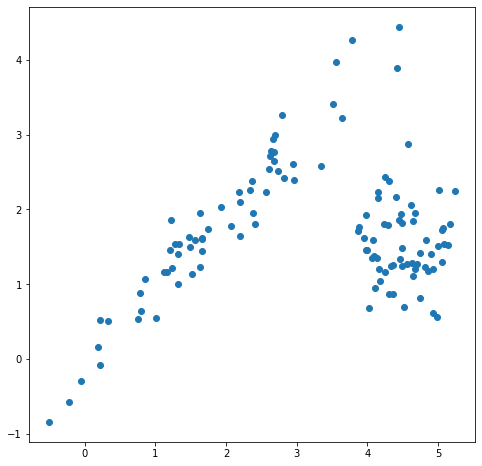

In [39]:
cluster_data = np.array(cluster_data)
plt.figure(figsize=(8,8))
plt.scatter(cluster_data[:,0], cluster_data[:,1])
plt.show()

### **Implement EM(Expectation Maximization) Algorithm on Gaussion Mixture Models**

In [44]:
class GMM:
    def __init__(self, k,class_names=None):
        self.k = k
        self.max_iteration = 100
        if class_names == None:
            self.class_names = [f"class{index}" for index in range(self.k)]
        else:
            self.class_names = class_names
        # pi list contains the fraction of the dataset for every cluster
        self.pi = [1/self.k for comp in range(self.k)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
      part_1 = (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)
      part_2 = np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)
      return part_1 * part_2

    def fit(self, X):
        # Spliting the data in k subsets
        data_subsets = np.array_split(X, self.k)
        
        # Initial mean-vector and covarience matrix
        self.mean_vector = [np.mean(x, axis=0) for x in data_subsets]
        self.covariance_matrixes = [(x - np.mean(x, axis = 0)).T.dot((x - np.mean(x, axis = 0))) / (x.shape[0]-1) for x in data_subsets]

        del data_subsets
        
        for i in range(self.max_iteration):
            ''' --------------------------   E - STEP   -------------------------- '''
            self.w = np.zeros((len(X), self.k))
            
            for m in range(len(X)):
                for k in range(self.k):
                    self.w[m][k] = self.pi[k] * self.multivariate_normal(X[m], self.mean_vector[k], self.covariance_matrixes[k])
                    self.w[m][k] /= sum([self.pi[j]*self.multivariate_normal(X[m], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.k)])
            
            # Calculating the sum of w and represent N
            sum_of_w = np.sum(self.w, axis=0)
            ''' --------------------------   M - STEP   -------------------------- '''
            
            self.mean_vector = np.zeros((self.k, len(X[0])))
            
            # Updating the mean vector
            for k in range(self.k):
                for n in range(len(X)):
                    self.mean_vector[k] += self.w[n][k] * X[n]
            self.mean_vector = [1/sum_of_w[k] * self.mean_vector[k] for k in range(self.k)]

            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.k)]
            
            # Updating the covariance matrices
            for k in range(self.k):
              self.covariance_matrixes[k] = np.cov(X.T)
            self.covariance_matrixes = [1/sum_of_w[k]*self.covariance_matrixes[k] for k in range(self.k)]
            
            # Updating the pi list
            self.pi = [sum_of_w[k]/len(X) for k in range(self.k)]

    def predict(self, X):
      predict_class = []
      for n in range(len(X)):
          predict_class.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                        for k in range(self.k)])
      cluster = []
      for prediction in predict_class:
        cluster.append(self.class_names[prediction.index(max(prediction))])
      return cluster


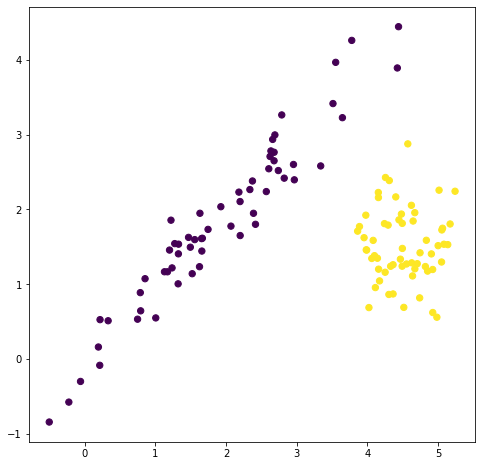

In [45]:
gaussian_mixture_model = GMM(k=2)
gaussian_mixture_model.fit(cluster_data)
cluster_names = gaussian_mixture_model.predict(cluster_data)
cluster_names = pd.Series(cluster_names)
convert_nums = {"class0": 0,
                "class1": 1}
clusters =cluster_names.replace(convert_nums)
plt.figure(figsize=(8,8))
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters, s=40);

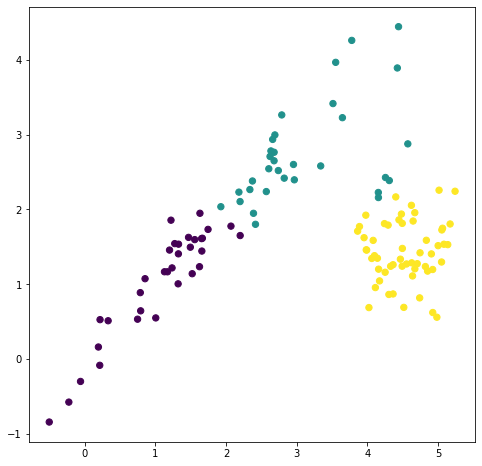

In [46]:
gaussian_mixture_model = GMM(k=3)
gaussian_mixture_model.fit(cluster_data)
cluster_names = gaussian_mixture_model.predict(cluster_data)
cluster_names = pd.Series(cluster_names)
convert_nums = {"class0": 0,
                "class1": 1,
                "class2": 2}
clusters =cluster_names.replace(convert_nums)
plt.figure(figsize=(8,8))
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters, s=40);